<a href="https://colab.research.google.com/github/vaishnavi4445/Heart_disease_prediction_and_ECG_analysis/blob/main/Heart_disease_prediction_and_ECG_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: ecg.csv not found. Please upload the file to your Colab environment.
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalac

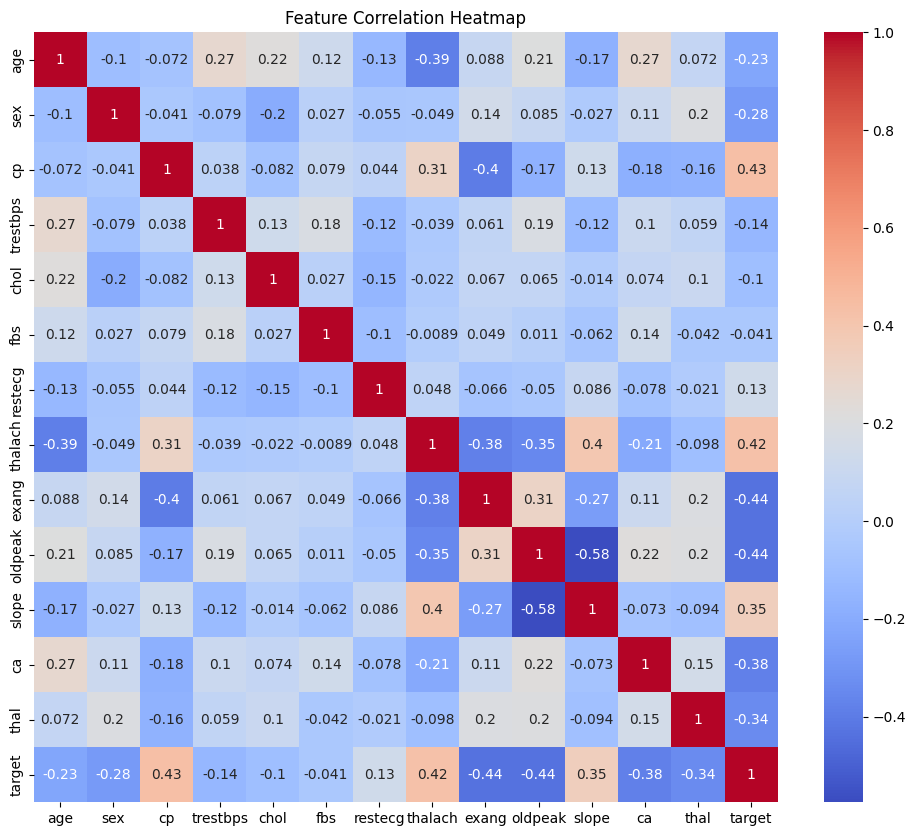

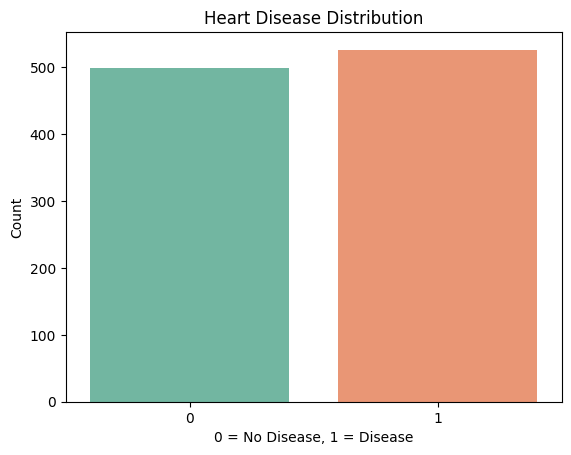

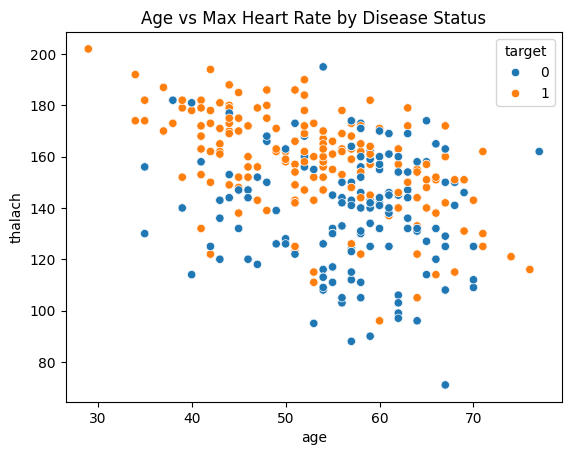

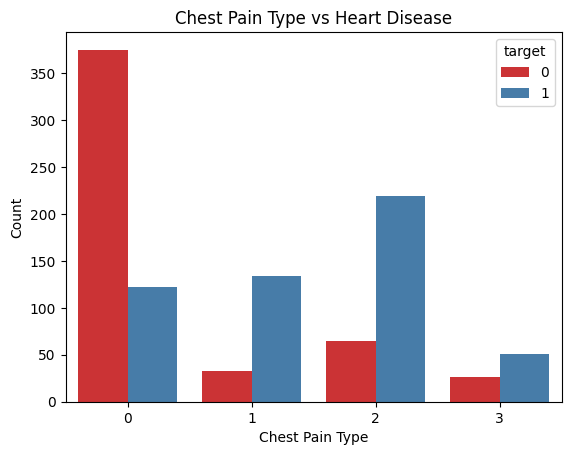

🌳 Decision Tree:
Accuracy: 0.8390243902439024
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Confusion Matrix:
 [[80 20]
 [13 92]]


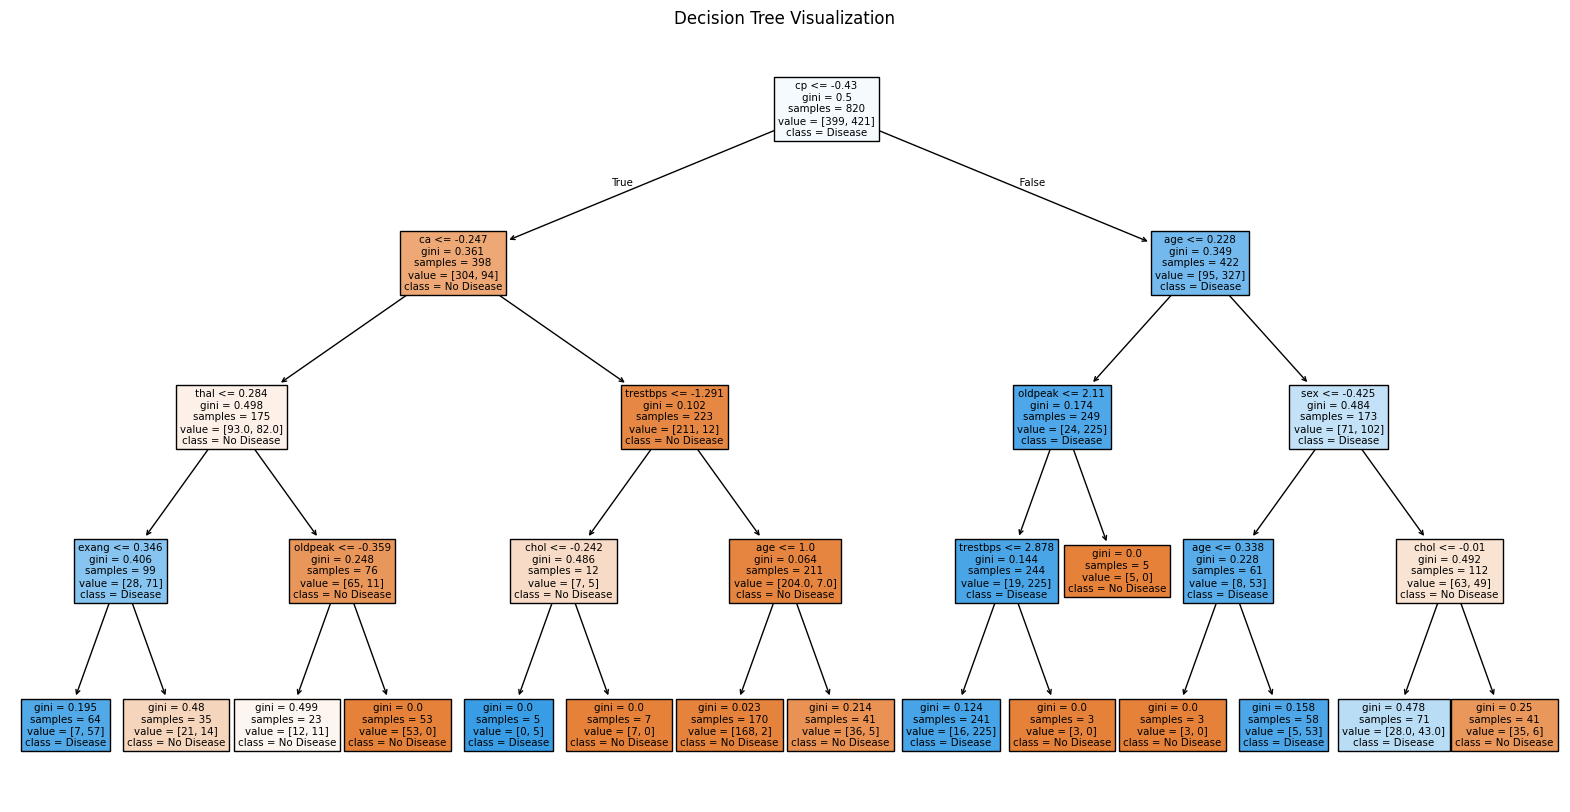


🌲 Random Forest:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]

⬆️ Gradient Boosting:
Accuracy: 0.975609756097561
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Confusion Matrix:
 [[ 97   3]
 [  2 103]]

💪 Support Vector Machine:
Accuracy: 0.9219512195121952
Classification Report:
               precision    recall  f1-score   suppo

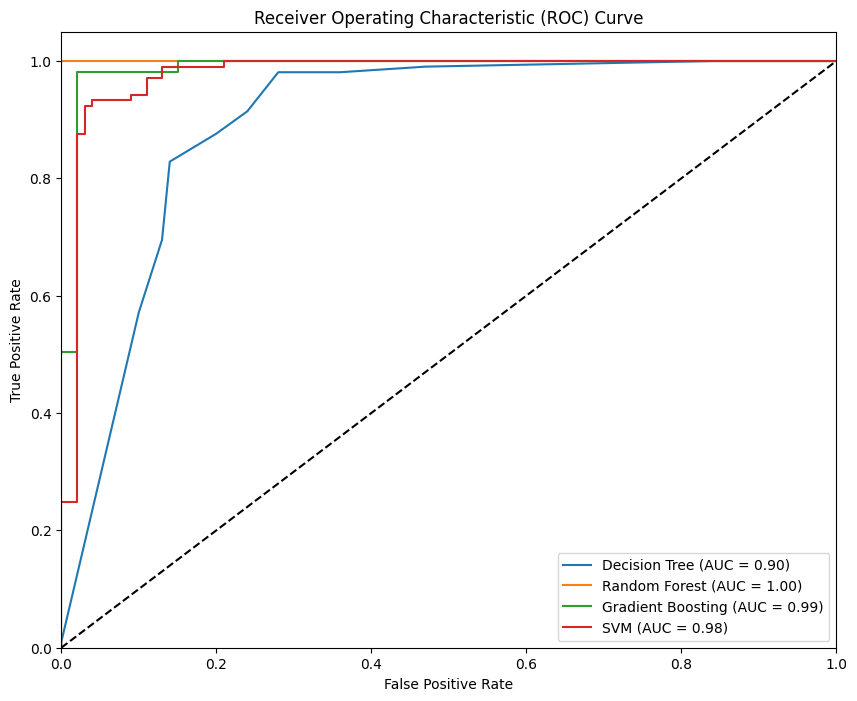


🧪 Hyperparameter Tuning for Random Forest:
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.9817073170731707

🧪 Hyperparameter Tuning for Gradient Boosting:
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy for Gradient Boosting: 0.9878048780487804

🧪 Hyperparameter Tuning for SVM:
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.9695121951219512


In [6]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# 📂 Load Dataset
# Assuming the user has uploaded ecg.csv to their Colab environment
try:
    df = pd.read_csv('ecg.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: ecg.csv not found. Please upload the file to your Colab environment.")


# 🔍 Basic Info
if 'df' in locals() and not df.empty: # Proceed only if dataframe was loaded successfully and is not empty
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Check if 'target' column exists for downstream tasks
    if 'target' in df.columns:
        print("\nTarget Value Counts:")
        print(df['target'].value_counts())

        # 📊 Correlation Heatmap
        plt.figure(figsize=(12,10))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title("Feature Correlation Heatmap")
        plt.show()

        # 📈 Target Distribution
        # Add hue and set legend=False to avoid FutureWarning
        sns.countplot(x='target', data=df, palette='Set2', hue='target', legend=False)
        plt.title("Heart Disease Distribution")
        plt.xlabel("0 = No Disease, 1 = Disease")
        plt.ylabel("Count")
        plt.show()

        # Check if 'age' and 'thalach' columns exist for plotting
        if 'age' in df.columns and 'thalach' in df.columns:
            # 📉 Age vs Max Heart Rate
            sns.scatterplot(x='age', y='thalach', hue='target', data=df)
            plt.title("Age vs Max Heart Rate by Disease Status")
            plt.show()
        else:
            print("\n'age' or 'thalach' columns not found for Age vs Max Heart Rate plot.")


        # Check if 'cp' column exists for plotting
        if 'cp' in df.columns:
            # 📊 Chest Pain Type vs Disease
            sns.countplot(x='cp', hue='target', data=df, palette='Set1')
            plt.title("Chest Pain Type vs Heart Disease")
            plt.xlabel("Chest Pain Type")
            plt.ylabel("Count")
            plt.show()
        else:
            print("\n'cp' column not found for Chest Pain Type vs Heart Disease plot.")


        # 🔍 Preprocessing
        X = df.drop('target', axis=1)
        y = df['target']

        # Scale the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # 🌳 Decision Tree
        print("🌳 Decision Tree:")
        dt = DecisionTreeClassifier(max_depth=4, random_state=42)
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred_dt))
        print("Classification Report:\n", classification_report(y_test, y_pred_dt))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

        # 📊 Visualize Tree
        plt.figure(figsize=(20,10))
        # Ensure feature names are from the original DataFrame columns before scaling
        plot_tree(dt, feature_names=X.columns.tolist(), class_names=['No Disease', 'Disease'], filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()


        # 🌲 Random Forest
        print("\n🌲 Random Forest:")
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred_rf))
        print("Classification Report:\n", classification_report(y_test, y_pred_rf))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


        # ⬆️ Gradient Boosting
        print("\n⬆️ Gradient Boosting:")
        gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        gb.fit(X_train, y_train)
        y_pred_gb = gb.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred_gb))
        print("Classification Report:\n", classification_report(y_test, y_pred_gb))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


        # 💪 Support Vector Machine
        print("\n💪 Support Vector Machine:")
        svm = SVC(probability=True, random_state=42)
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred_svm))
        print("Classification Report:\n", classification_report(y_test, y_pred_svm))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


        # 🔁 Cross-Validation with Stratified K-Fold
        print("\n🔁 Cross-Validation (Stratified K-Fold):")
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        dt_scores = cross_val_score(dt, X_scaled, y, cv=cv, scoring='accuracy')
        print("Decision Tree CV Accuracy:", dt_scores.mean())

        rf_scores = cross_val_score(rf, X_scaled, y, cv=cv, scoring='accuracy')
        print("Random Forest CV Accuracy:", rf_scores.mean())

        gb_scores = cross_val_score(gb, X_scaled, y, cv=cv, scoring='accuracy')
        print("Gradient Boosting CV Accuracy:", gb_scores.mean())

        svm_scores = cross_val_score(svm, X_scaled, y, cv=cv, scoring='accuracy')
        print("SVM CV Accuracy:", svm_scores.mean())


        # 📊 Model Comparison
        results = pd.DataFrame({
            'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM'],
            'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf),
                         accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm)]
        })
        print("\n📊 Model Comparison (Test Set):")
        print(results.sort_values(by='Accuracy', ascending=False))


        # 📈 ROC Curve
        plt.figure(figsize=(10, 8))
        models = [dt, rf, gb, svm]
        model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']

        for i, model in enumerate(models):
            # Check if the model has predict_proba (SVM needs probability=True)
            if hasattr(model, 'predict_proba'):
                y_prob = model.predict_proba(X_test)[:, 1]
                fpr, tpr, thresholds = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
            else:
                print(f"Model {model_names[i]} does not have predict_proba. Skipping ROC curve for this model.")


        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()


        # 🧪 Optional: Hyperparameter Tuning for Random Forest
        print("\n🧪 Hyperparameter Tuning for Random Forest:")
        # Reduced parameter grid for faster execution
        param_grid_rf = {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
        # Consider using RandomizedSearchCV for larger parameter spaces
        # grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_grid_rf, n_iter=10, cv=cv, scoring='accuracy', random_state=42)
        grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv, scoring='accuracy')
        grid_rf.fit(X_train, y_train)
        print("Best Parameters for Random Forest:", grid_rf.best_params_)
        print("Best Cross-Validation Accuracy for Random Forest:", grid_rf.best_score_)

        # 🧪 Optional: Hyperparameter Tuning for Gradient Boosting
        print("\n🧪 Hyperparameter Tuning for Gradient Boosting:")
        # Consider reducing the parameter grid or using RandomizedSearchCV
        param_grid_gb = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        }
        grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=cv, scoring='accuracy')
        grid_gb.fit(X_train, y_train)
        print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)
        print("Best Cross-Validation Accuracy for Gradient Boosting:", grid_gb.best_score_)

        # 🧪 Optional: Hyperparameter Tuning for SVM
        print("\n🧪 Hyperparameter Tuning for SVM:")
        # Consider reducing the parameter grid or using RandomizedSearchCV
        param_grid_svm = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
        grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=cv, scoring='accuracy')
        grid_svm.fit(X_train, y_train)
        print("Best Parameters for SVM:", grid_svm.best_params_)
        print("Best Cross-Validation Accuracy for SVM:", grid_svm.best_score_)

    else:
        print("\n'target' column not found in the dataset. Please ensure the dataset has a 'target' column for classification.")

else:
    print("\nData loading failed or the DataFrame is empty. Please upload the 'ecg.csv' file and ensure it contains data.")